In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Lung Segmentation

In [2]:
import sys, os, pathlib
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import pandas as pd
import torch
import nibabel as nib

sys.path.append('../..')
import project

torch.cuda.is_available()

True

In [3]:
%autoreload
data_root = pathlib.Path('/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene')
data_file = data_root / 'sample1000_2025-07-22.csv'

# load sampled data file
df_sampled = pd.read_csv(data_file, sep='\t', low_memory=False)
df_sampled

sid ccenter kernel  Emphysema  pctEmph  pctEmph_Slicer  FEV1pp_utah  \
0    16514P     TEM    STD          0   0.3373          0.3147         77.6   
1    20748Q     UAB    STD          0   3.6045          3.4085         73.2   
2    11007Z     USD    STD          0   0.3126          0.2867         66.7   
3    14771Z     HPR    STD          0   0.3160          0.2948         94.1   
4    13651K     UIA    STD          0   2.0807          1.9551         85.1   
..      ...     ...    ...        ...      ...             ...          ...   
995  20519B     DUK    STD          1  30.1942         29.6440         19.9   
996  12294H     UAB    STD          1  40.3908         39.5845         43.3   
997  23123R     TEM    STD          0  23.6838         22.7617         42.8   
998  16546C     UIA    STD          1  42.6116         41.8307         58.6   
999  11099E     TXS    STD          0  28.6031         28.0289         52.3   

     FVCpp_utah  FEV1_FVC_utah  finalGold catEmph  
0          88.9           0.71       -1.0  normal  
1          75.8           0.75       -1.0  normal  
2         108.0           0.47        2.0  normal  
3          97.0           0.73        0.0  normal  
4          88.0           0.75        0.0  normal  
..          ...            ...        ...     ...  
995        69.2           0.22        4.0  severe  
996        86.0           0.37        3.0  severe  
997        72.7           0.45        3.0  severe  
998        99.6           0.43        2.0  severe  
999        96.0           0.41        2.0  severe  

[1000 rows x 11 columns]

In [4]:
dataset = project.copdgene.COPDGeneDataset(df_sampled, data_root)
dataset

In [5]:
row, visit = dataset[0]
row

sid               16514P
ccenter              TEM
kernel               STD
Emphysema              0
pctEmph           0.3373
pctEmph_Slicer    0.3147
FEV1pp_utah         77.6
FVCpp_utah          88.9
FEV1_FVC_utah       0.71
finalGold           -1.0
catEmph           normal
Name: 0, dtype: object

In [6]:
image_name = visit.build_image_name(state='INSP', recon='STD')
image_name

'16514P_INSP_STD_TEM_COPD'

In [30]:
project.segmentation.run_segmentation_tasks(visit, variant='RAW', image_name=image_name)

Running total segmentation task on /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough segmentation for cropping...
Resampling...
  Resampled in 3.10s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

  Predicted in 95.56s
Resampling...
  cropping from (512, 512, 383) to (412, 327, 371)
Resampling...
  Resampled in 2.71s
Predicting part 1 of 1 ...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

  Predicted in 11.75s
Resampling...
Saving segmentations...


  0%|          | 0/5 [00:00<?, ?it/s]

  Saved in 6.67s
Running lung_vessels segmentation task on /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Generating rough segmentation for cropping...
Resampling...
  Resampled in 3.10s
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

  Predicted in 8.85s
Resampling...
  cropping from (512, 512, 383) to (412, 327, 371)
Predicting...


/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

  Predicted in 39.78s
Saving segmentations...


  0%|          | 0/2 [00:00<?, ?it/s]

Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz

  Saved in 5.45s
Combining segmentation masks
Combined mask saved to /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/TotalSegmentator/16514P_INSP_STD_TEM_COPD/lung_combined_mask.nii.gz


In [13]:
%autoreload
project.segmentation.create_lung_region_mask(visit, variant='RAW', image_name=image_name, mask_name='lung_regions')

Loading lung mask from /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/TotalSegmentator/16514P_INSP_STD_TEM_COPD/lung_combined_mask.nii.gz
Filtering lung mask
[lung] Mask has 2 connected components
[lung] Component 1 has 8972563 voxels (99.9993%)
[lung] 64 voxels were dropped (0.0007%)
Loading airway mask from /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/TotalSegmentator/16514P_INSP_STD_TEM_COPD/lung_trachea_bronchia.nii.gz
Filtering airway mask
[airways] Mask has 24 connected components
[airways] Component 1 has 54292 voxels (99.3886%)
[airways] Component 16 has 100 voxels (0.1831%)
[airways] 234 voxels were dropped (0.4284%)
Loading vessel mask from /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/TotalSegmentator/16514P_INSP_STD_TEM_COPD/lung_vessels.nii.gz
Filtering vessel mask
[vessels] Mask has 2248 connected components
[vessels] Component 10 has 145188 vox

In [15]:
nifti = nib.load(visit.mask_file(variant='RAW', image_name=image_name, mask_name='lung_regions'))
nifti

In [26]:
image_file = visit.image_file(variant='RAW', image_name=image_name)
mask_file = visit.mask_file(variant='RAW', image_name=image_name, mask_name='lung_regions')

In [28]:
def load_nifti(fname, name=None):
    nifti = nib.load(fname)
    return project.utils.as_xarray(nifti.get_fdata(), resolution=nifti.header.get_zooms(), dims=['x', 'y', 'z'], name=name)

image = load_nifti(image_file, name='CT')
mask  = load_nifti(mask_file, name='regions')

interactive(children=(Output(),), _dom_classes=('widget-interact',))

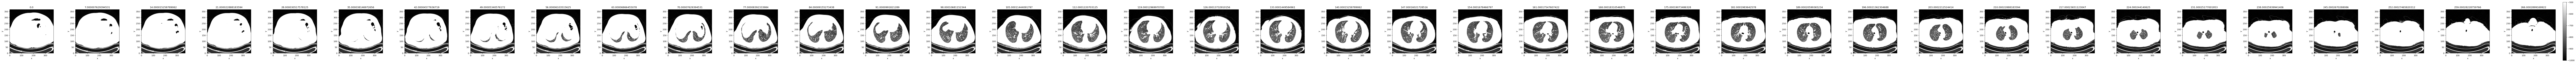

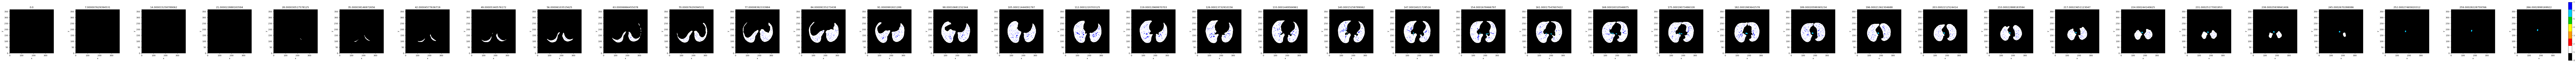

In [32]:
view_xarray = project.visual.XArrayViewer
view_xarray(image[:,:,::10], col='z')
view_xarray(mask[:,:,::10], col='z')

In [28]:
variant = 'RAW'

lung_file = visit.mask_file(variant, image_name, mask_name='lung_combined_mask')
lung_nifti = nib.load(lung_file)
lung_mask = lung_nifti.get_fdata().astype(bool)

airway_file = visit.mask_file(variant, image_name, mask_name='lung_trachea_bronchia')
airway_nifti = nib.load(airway_file)
airway_mask = airway_nifti.get_fdata().astype(bool)

vessel_file = visit.mask_file(variant, image_name, mask_name='lung_vessels')
vessel_nifti = nib.load(vessel_file)
vessel_mask = vessel_nifti.get_fdata().astype(bool)

In [29]:
%autoreload
project.segmentation.filter_connected_components(lung_mask)

mask contains {n_regions} regions
region 1 has 8972563 voxels (99.9993%)
region 2 has 64 voxels (0.0007%)


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [26]:
project.segmentation.filter_connected_components(airway_mask)

label 1 has 54292 voxels (99.3886%): True
label 2 has 16 voxels (0.0293%): False
label 3 has 7 voxels (0.0128%): False
label 4 has 5 voxels (0.0092%): False
label 5 has 2 voxels (0.0037%): False
label 6 has 26 voxels (0.0476%): False
label 7 has 43 voxels (0.0787%): False
label 8 has 4 voxels (0.0073%): False
label 9 has 1 voxels (0.0018%): False
label 10 has 3 voxels (0.0055%): False
label 11 has 14 voxels (0.0256%): False
label 12 has 1 voxels (0.0018%): False
label 13 has 2 voxels (0.0037%): False
label 14 has 2 voxels (0.0037%): False
label 15 has 18 voxels (0.0330%): False
label 16 has 100 voxels (0.1831%): False
label 17 has 27 voxels (0.0494%): False
label 18 has 19 voxels (0.0348%): False
label 19 has 4 voxels (0.0073%): False
label 20 has 21 voxels (0.0384%): False
label 21 has 6 voxels (0.0110%): False
label 22 has 6 voxels (0.0110%): False
label 23 has 5 voxels (0.0092%): False
label 24 has 2 voxels (0.0037%): False


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [27]:
project.segmentation.filter_connected_components(vessel_mask)

mask contains {n_regions} regions
region 1 has 1 voxels (0.0002%): False
region 2 has 2 voxels (0.0004%): False
region 3 has 86260 voxels (16.1434%): True
region 4 has 17 voxels (0.0032%): False
region 5 has 1 voxels (0.0002%): False
region 6 has 3 voxels (0.0006%): False
region 7 has 5 voxels (0.0009%): False
region 8 has 2 voxels (0.0004%): False
region 9 has 3 voxels (0.0006%): False
region 10 has 145188 voxels (27.1716%): True
region 11 has 120 voxels (0.0225%): False
region 12 has 1 voxels (0.0002%): False
region 13 has 2 voxels (0.0004%): False
region 14 has 1 voxels (0.0002%): False
region 15 has 29 voxels (0.0054%): False
region 16 has 19 voxels (0.0036%): False
region 17 has 7 voxels (0.0013%): False
region 18 has 93 voxels (0.0174%): False
region 19 has 1 voxels (0.0002%): False
region 20 has 2 voxels (0.0004%): False
region 21 has 9 voxels (0.0017%): False
region 22 has 1 voxels (0.0002%): False
region 23 has 2 voxels (0.0004%): False
region 24 has 2 voxels (0.0004%): False


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [42]:
import skimage
regions, n_regions = skimage.measure.label(lung_mask, background=0, return_num=True)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [11]:
project.segmentation.create_lung_region_mask(visit, variant='RAW', image_name=image_name)

Creating lung region mask for 16514P Phase-1 image: 16514P_INSP_STD_TEM_COPD
[100.   0.]
64 voxels were dropped, 8972563 are left (0.0% dropped)
[99.4  0.   0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
334 voxels were dropped, 54292 are left (0.6% dropped)
Saved to /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/TotalSegmentator/16514P_INSP_STD_TEM_COPD/lung_regions.nii.gz


In [12]:
image = visit.load_image('RAW', image_name)
image.name = 'CT'
image

<xarray.DataArray 'CT' (x: 512, y: 512, z: 383)> Size: 803MB
array([[[ -976.,  -988., -1024., ..., -1024., -1000., -1013.],
        [-1011., -1024., -1008., ..., -1011.,  -994., -1016.],
        [-1013., -1018.,  -996., ..., -1024., -1014., -1018.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[ -977.,  -959.,  -931., ..., -1013., -1006., -1014.],
        [ -975., -1012., -1015., ..., -1018.,  -999., -1004.],
        [-1019., -1024.,  -995., ..., -1024., -1014., -1004.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1000.,  -986., -1005., ..., -1013., -1022., -1005.],
        [ -977.,  -967.,  -982., ...,  -995., -1003., -1008.],
        [ -996., -1016., -1008., ..., -1002.,  -997., -1001.],
        ...,
...
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]]])
Coordinates:
  * x        (x) float64 4kB 0.0 0.7188 1.438 2.156 ... 365.1 365.8 366.6 367.3
  * y        (y) float64 4kB 0.0 0.7188 1.438 2.156 ... 365.1 365.8 366.6 367.3
  * z        (z) float64 3kB 0.0 0.7 1.4 2.1 2.8 ... 265.3 266.0 266.7 267.4

In [13]:
z_inds = np.linspace(0, image.sizes['z'] - 1, 10).astype(int)
z_inds

array([  0,  42,  84, 127, 169, 212, 254, 297, 339, 382])

In [14]:
project.visual.XArrayViewer(
    image.isel(z=z_inds), x='x', y='y', col='z'
)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [15]:
masks = visit.load_masks('RAW', image_name, roi_list=all_rois)
masks.name = 'mask'
masks

NameError: name 'all_rois' is not defined

In [ ]:
project.visual.XArrayViewer(
    masks.isel(z=z_inds), x='x', y='y', col='z', row='roi'
)

Creating lung region mask for subject 10009Y visit Phase-1 image 10009Y_EXP_SHARP_NJC_COPD
[56.7  0.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 43.1]
3794 voxels were dropped, 1551207 are left (0.2% dropped)
[ 0.5  0.   0.   0.   0.   0.   0.1  0.   0.1  0.   0.   0.   0.   0.
  0.   0.1  0.1  0.   0.1  0.   0.   0.   0.1  0.1  0.2  0.   0.1  0.1
  0.1  0.   0.   0.1  0.2  0.   0.   0.   0.1  0.   0.2  0.1  0.   0.1
  0.1  0.   0.2  0.   0.1  0.   0.   0.1  0.   0.1  0.   0.5  0.   0.
  1.   0.1  0.   0.   0.   0.5  0.3  0.1  0.   0.2  0.   0.   0.   0.1
  0.   0.3  0.   0.1  0.   0.   0.   0.1  0.   0.2  0.1  0.   0.1  0.
  0.   0.   0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.2  0.1  0.   0.1  0.   0.   0.1  0.   0.1
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  89.8  0.   0.   0.   0.   0.1  0.   0.   0.1  0.
  0.2  0.1  0.   0.   0.   0.1  0.   0.   0.   0.1  0.   0.1  0.   0.1

# Process full dataset

In [58]:
# run segmentation tasks on sampled data
for row, visit in dataset:
    project.segmentation.create_segmentation_masks(visit, variant='RAW', recon='STD')

Running total segmentation task on /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz


NameError: name 'total_task_rois' is not defined

interactive(children=(Output(),), _dom_classes=('widget-interact',))

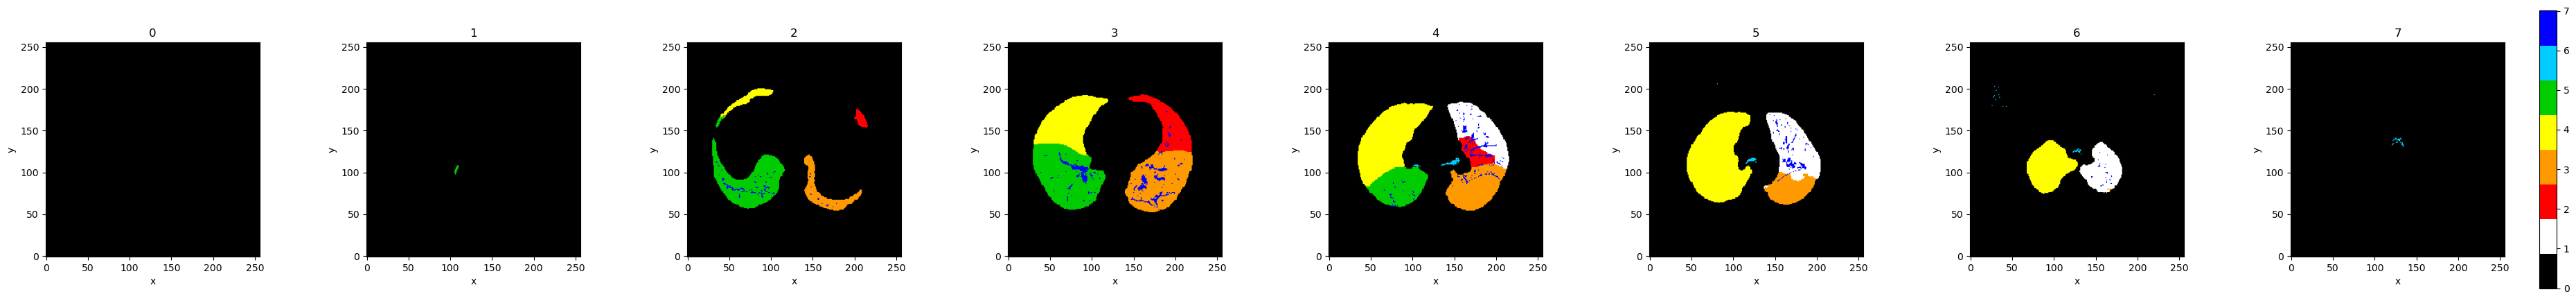

In [22]:
xview(project.utils.as_xarray(regions[:,:,31::32], name='regions', dims=['x', 'y', 'z']), col='z')

```






```

In [34]:
%%time
validate_only = True

for i, subject in enumerate(dataset.subjects):
    for j, visit in enumerate(subject.visits):
        for k, image_name in enumerate(visit.list_images('Resized')):
            print((i,j,k), visit.subject_id, visit.visit_name, image_name)
            if validate_only:
                assert visit.image_file(image_dir, image_name).exists()
                assert visit.mask_file(mask_dir, image_name, roi='lung_combined_mask').exists()
                assert visit.mask_file(mask_dir, image_name, roi='lung_regions').exists()
                assert visit.mesh_file(mesh_dir, image_name, mask_roi='lung_regions',  mesh_version=10).exists()
            else:
                run_totalsegmentator_tasks(visit, image_name, image_dir, mask_dir)
                regions = create_lung_region_mask(visit, image_name, mask_dir, new_roi='lung_regions')


(0, 0, 0) 10009Y Phase-1 10009Y_EXP_SHARP_NJC_COPD
(0, 0, 1) 10009Y Phase-1 10009Y_EXP_STD_NJC_COPD
(0, 0, 2) 10009Y Phase-1 10009Y_INSP_SHARP_NJC_COPD
(0, 0, 3) 10009Y Phase-1 10009Y_INSP_STD_NJC_COPD
(1, 0, 0) 10028C Phase-1 10028C_EXP_SHARP_NJC_COPD
(1, 0, 1) 10028C Phase-1 10028C_EXP_STD_NJC_COPD
(1, 0, 2) 10028C Phase-1 10028C_INSP_SHARP_NJC_COPD
(1, 0, 3) 10028C Phase-1 10028C_INSP_STD_NJC_COPD
(2, 0, 0) 10090H Phase-1 10090H_EXP_SHARP_NJC_COPD
(2, 0, 1) 10090H Phase-1 10090H_EXP_STD_NJC_COPD
(2, 0, 2) 10090H Phase-1 10090H_INSP_SHARP_NJC_COPD
(2, 0, 3) 10090H Phase-1 10090H_INSP_STD_NJC_COPD
(3, 0, 0) 10161E Phase-1 10161E_EXP_SHARP_NJC_COPD
(3, 0, 1) 10161E Phase-1 10161E_EXP_STD_NJC_COPD
(3, 0, 2) 10161E Phase-1 10161E_INSP_SHARP_NJC_COPD
(3, 0, 3) 10161E Phase-1 10161E_INSP_STD_NJC_COPD
(4, 0, 0) 10171H Phase-1 10171H_EXP_SHARP_NJC_COPD
(4, 0, 1) 10171H Phase-1 10171H_EXP_STD_NJC_COPD
(4, 0, 2) 10171H Phase-1 10171H_INSP_SHARP_NJC_COPD
(4, 0, 3) 10171H Phase-1 10171H_INSP_STD